# Détection de spams

4601 observations, 57 variables (numériques)

Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

source : https://archive.ics.uci.edu/ml/datasets/Spambase

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, roc_curve, f1_score, recall_score, precision_score
from sklearn import linear_model

## Importation des données

In [76]:
varnames = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names",
                  sep=":",
                  skiprows=33,
                  names = ["name","type"],
                  header=None)
varnames = list(  varnames["name"])+["class"] 

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",
                  sep=",",
                  names = varnames,
                  header=None)

data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [77]:
data_np = data.to_numpy()


# Avec sélection de 3 classes
X = data_np[:,:-1]
print("Taille de X : ",X.shape)
Y = data_np[:,-1]
print("Longueur de Y : ", Y.shape)

Taille de X :  (4601, 57)
Longueur de Y :  (4601,)


## Statistiques descriptives

Text(0.5, 1.0, 'Répartition du type de messages')

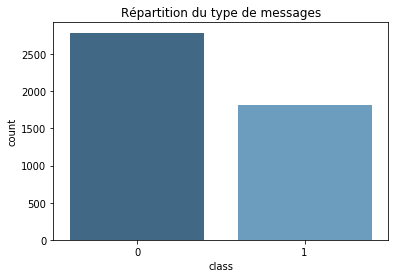

In [78]:
sns.countplot(x="class",data=data,palette="Blues_d")
plt.title("Répartition du type de messages")

Text(0, 0.5, 'PC2 (6.0%)')

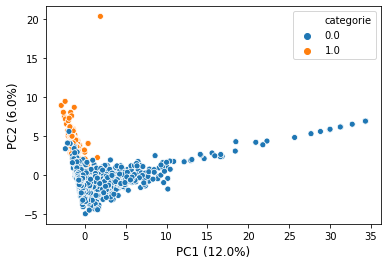

In [79]:
from sklearn.decomposition import PCA


scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_sc)

PC = pca.transform(X_sc)

d = {'PC1': PC[:,0], 'PC2': PC[:,1], 'categorie':Y}
df = pd.DataFrame(data=d)

sns.scatterplot(x="PC1",y="PC2",hue="categorie",data = df)
plt.xlabel("PC1 ("+str(round(pca.explained_variance_ratio_[0]*100))+"%)" , size = 12 ) 
plt.ylabel( "PC2 ("+str(round(pca.explained_variance_ratio_[1]*100))+"%)"  , size = 12 ) 

Un premier exemple de construction d'un arbre de classification. On commence comme d'habitude à générer un ensemble d'apprentissage et un ensemble de test. L'argument random_state permet de fixer la graine du générateur pseudo-aléatoire. 


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### 1- Ajuster un modèle d'arbre de decision de profendeur 3 entre X_train et y_train

Hint: utiliser la fonction DecisionTreeClassifier

In [81]:
############# code ici
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

#### 1-1 Représenter l'arbre obtenu

On peut alors représenter l'arbre obtenu. Dans chaque noeud, on retrouve la règle de coupure, la vleur de l'indice de Gini, le nombre d'observations et, dans "value" le nombre d'individus de la classe ham et celui de la classe spam. 
Plus la case est orange et plus la proportion de ham est forte et inversement plus la feuille est bleue et plus la proportion de spam est forte. 
Rq : ces proportions sont calculées sur l'ensemble d'apprentissage. 

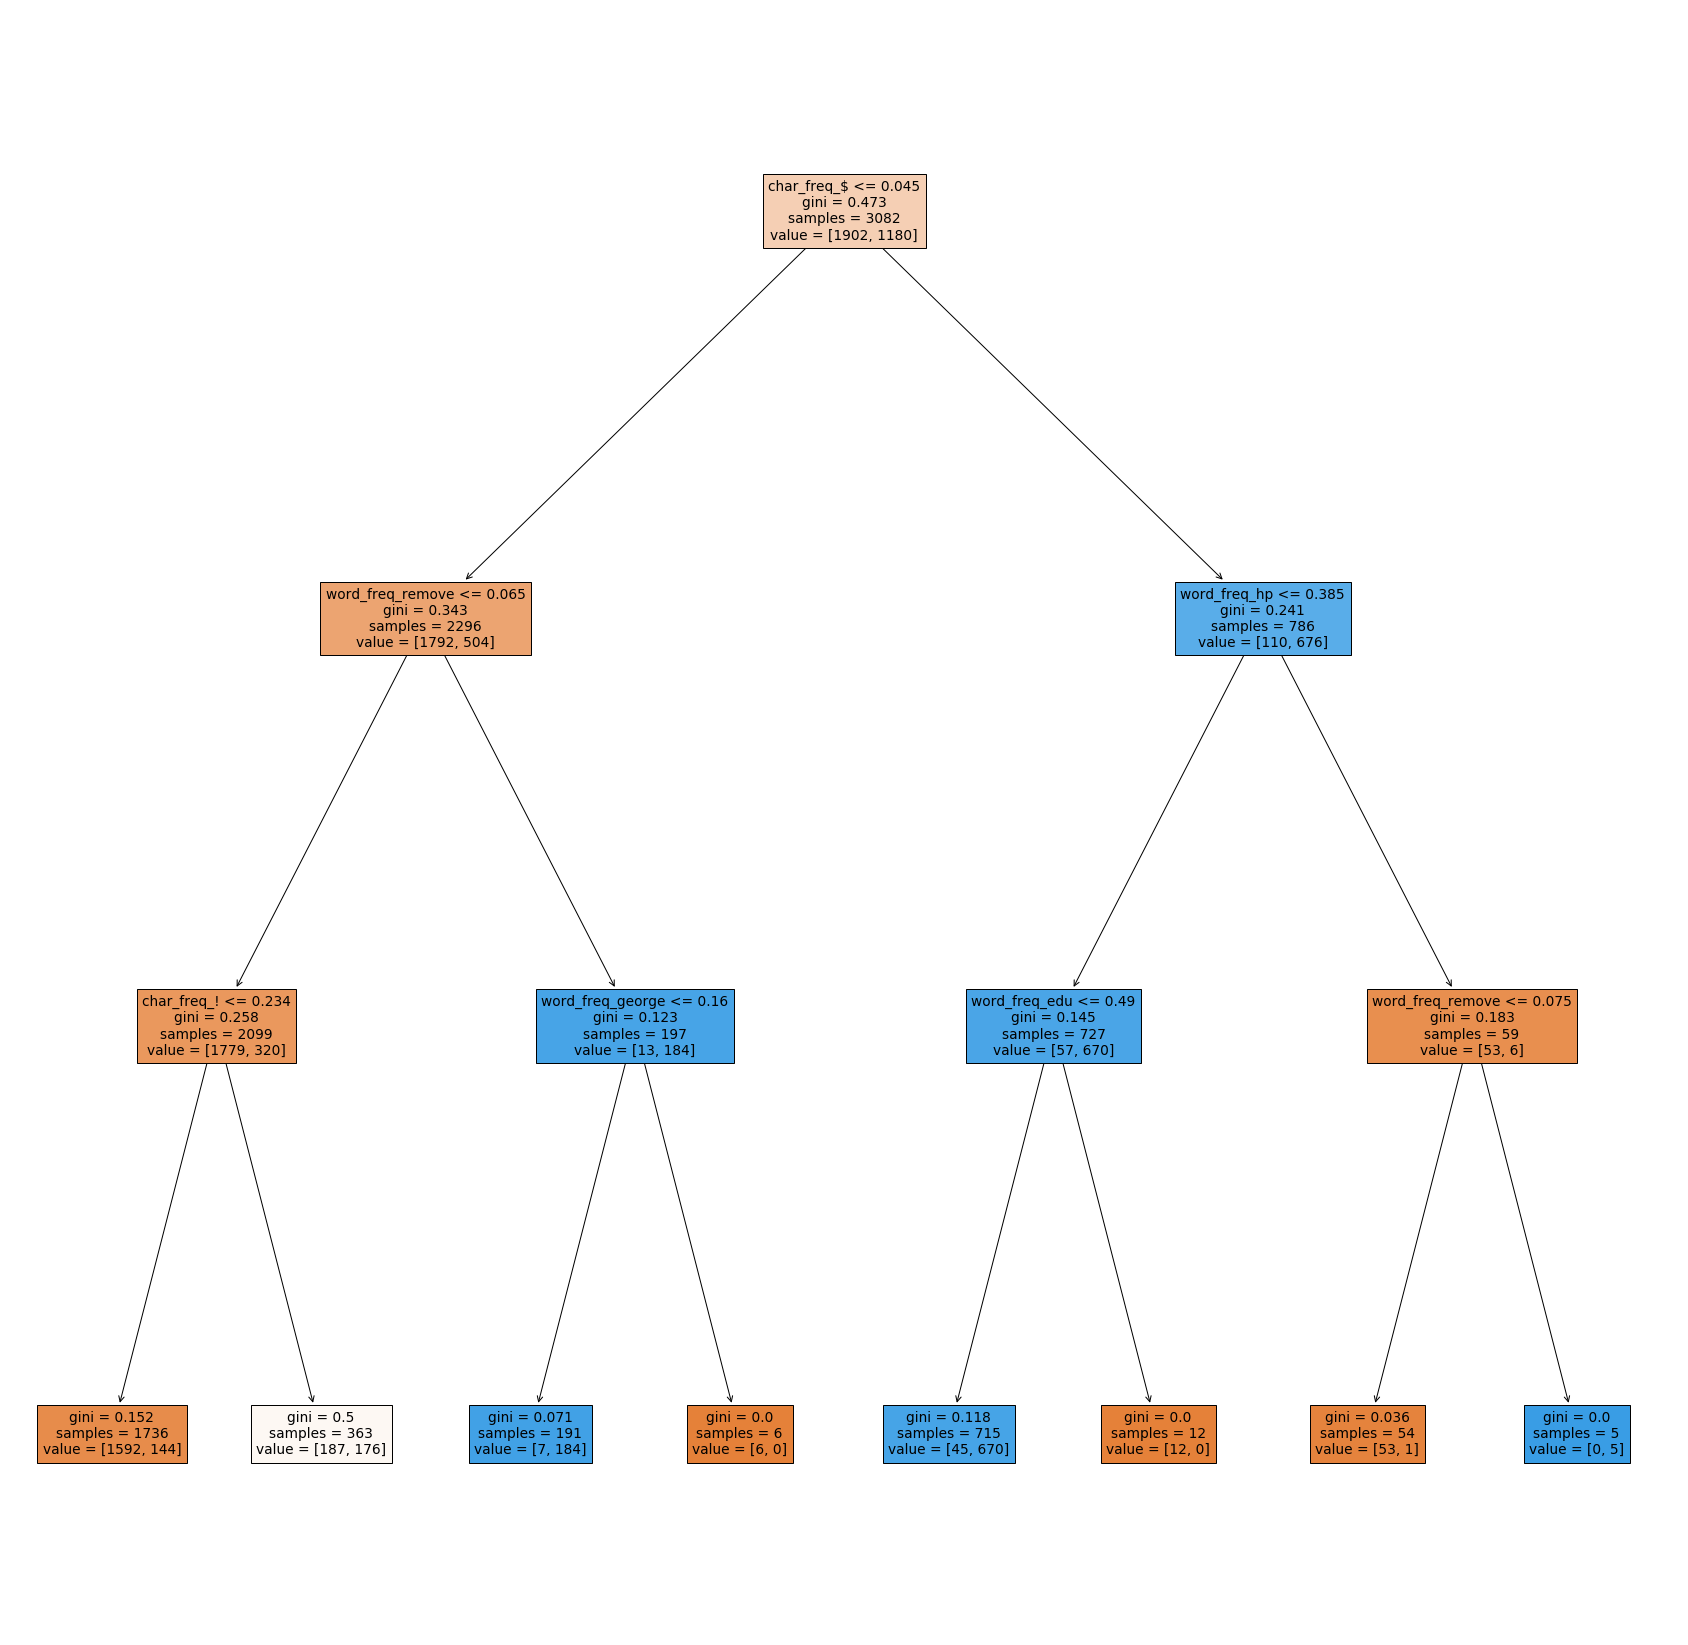

In [82]:
########### code ici
plt.figure(figsize=(30,30))
plot_tree(clf,filled=True, feature_names=varnames) 
plt.show()

#### 1-2 Utiliser le modèle pour faire les prédictions et evaluer le modèle

##### Critères performance

    Accuracy = proportion d'individus bien classés (toutes classes confondues)

    Precision : proportion d'individus bien classés dans a classe "positive" . Dans le cas des spam la classe positive devrait être la classe des spams. 

    Ici, une liste : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/


In [83]:
########## code ici
y_pred = clf.predict(X_test)
f1 = f1_score(y_test,y_pred,pos_label=1)
r = recall_score(y_test,y_pred,pos_label=1)
p = precision_score(y_test,y_pred,pos_label=1)
print("Precision:"%d, np.round(p,3), "recall:"%d, np.round(r,3), "f1-score:"%d, np.round(f1,3))

Precision: 0.947 recall: 0.711 f1-score: 0.812


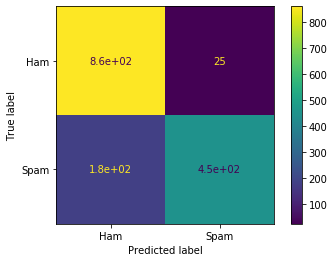

In [84]:
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=["Ham","Spam"]).plot()

### 2- Selectionner la profendeur maximum optimale de l'arbre 
Hint: utiliser la validation croisé en faisant varier la profendeur. Au final vous obtiendrez un critère de performance pour chaque valeur de profendeur. Vous pouvez faire un graphique dont les abscisses et les ordonnées representent les profendeurs et les critères, respectivement. 

In [85]:
########### code ici 
from sklearn.model_selection import KFold
B = 10
cv = KFold(n_splits=B, random_state=4, shuffle=True)
prof_max = np.arange(1,20,3)
acc = np.zeros((prof_max.shape[0],B))
i = 0
for K in prof_max:
    folds = cv.split(y_train)
    j = 0
    for train_index, test_index in folds:
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        Y_train_cv, Y_test_cv = y_train[train_index], y_train[test_index]
        clf = DecisionTreeClassifier(max_depth=3)
        clf.fit(X_train_cv, Y_train_cv)
        Y_pred = clf.predict(X_test_cv)
        p = accuracy_score(Y_test_cv, Y_pred)
        acc[i,j] = p
        j = j+1
    i = i+1

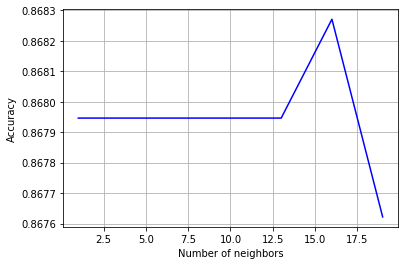

In [86]:
acc_mean = acc.mean(axis = 1)
fig, ax = plt.subplots()
plt.plot(prof_max, acc_mean, color = 'b')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid()

### 3- Utiliser la fonction prédéfinie GridSearchCV et faire varier les hyper-paramètres: profendeur maximum d'arbre, nombre minimum d'observation par feuille et  le splitter

In [31]:
# Generation de B train/validation ensemble
B = 5
cv = KFold(n_splits=B, random_state=4, shuffle=True)

########### code ici
param_grid = {'max_depth':[5,10,15,20], 
             'min_samples_leaf':[5,10,15,20],
             'splitter' : ['best', 'random']}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### 4- Retrouver le meilleur modèle et valider le dans l'ensemble test (critères de validation + matrice de confusion + courbe ROC)

In [32]:
########## code ici
scoring=("accuracy","precision","recall","f1","roc_auc")

tree = search.best_estimator_
cv_scores = cross_validate(tree, X_train, y_train, cv=cv,scoring=scoring)

print("Performances de l'arbre de décision")
print("Accuracy  : ", np.round(np.mean(cv_scores["test_accuracy"]),2), "(",np.round(np.std(cv_scores["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores["test_precision"]),2), "(",np.round(np.std(cv_scores["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores["test_recall"]),2), "(",np.round(np.std(cv_scores["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores["test_f1"]),2), "(",np.round(np.std(cv_scores["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores["test_roc_auc"]),2), "(",np.round(np.std(cv_scores["test_roc_auc"]),2),")")

Performances de l'arbre de décision
Accuracy  :  0.92 ( 0.01 )
Precision :  0.91 ( 0.02 )
Recall    :  0.86 ( 0.01 )
F1-score  :  0.89 ( 0.02 )
AUC       :  0.94 ( 0.01 )


Confusion matrix  : 
[[841  45]
 [ 97 536]]
 
Confusion matrix (proportions) : 
[[0.95 0.05]
 [0.15 0.85]]
 


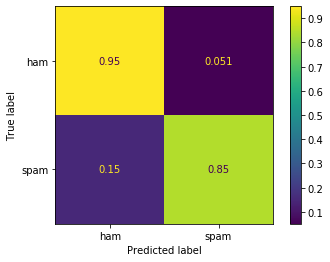

<Figure size 432x432 with 0 Axes>

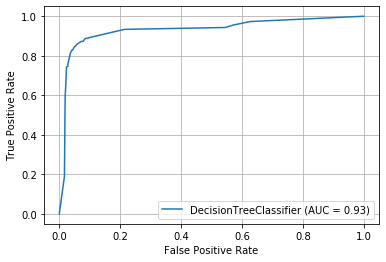

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_tree = tree.predict(X_test)
print("Confusion matrix  : ")
print(confusion_matrix(y_test,y_pred_tree))
print(' ')
print("Confusion matrix (proportions) : ")
cm = confusion_matrix(y_test,y_pred_tree,normalize='true')
print(np.round(cm,2))
print(' ')

ConfusionMatrixDisplay(cm, display_labels=["ham","spam"]).plot()
                                       

plt.figure(figsize=(6,6))
plot_roc_curve(tree,X_test,y_test)
plt.grid()

tree_fpr, tree_tpr, thresholds = roc_curve(y_test, y_pred_tree)

### 5- Comparer avec l'algorithme des plus proches voisins
Hint: il faut faire la validation croisée sélectionner les hyper parameteres! vous pouver utiliser la fonction GridSearchCV 

In [34]:
############## code ici pour la validation croisée 
knn = neighbors.KNeighborsClassifier(weights="distance",metric="manhattan")
#param_grid = [{'n_neighbors': [1,5,10,20], 
#               'weights': ['uniform','distance'],
#               'metric': ['euclidean','manhattan']}]
param_grid = [{'n_neighbors': [1,5,10,20]}]
# Optimization of the hyperparameters
search = GridSearchCV(knn, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train_sc,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')


In [35]:
############## code ici pour la comparaison
knn_best = search.best_estimator_
cv_scores = cross_validate(knn_best, X_train_sc, y_train, cv=cv,scoring=scoring)

print("Performances de l'estimateur des plus proches voisins")
print("Accuracy  : ", np.round(np.mean(cv_scores["test_accuracy"]),2), "(",np.round(np.std(cv_scores["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores["test_precision"]),2), "(",np.round(np.std(cv_scores["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores["test_recall"]),2), "(",np.round(np.std(cv_scores["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores["test_f1"]),2), "(",np.round(np.std(cv_scores["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores["test_roc_auc"]),2), "(",np.round(np.std(cv_scores["test_roc_auc"]),2),")")

Performances de l'estimateur des plus proches voisins
Accuracy  :  0.92 ( 0.01 )
Precision :  0.94 ( 0.01 )
Recall    :  0.83 ( 0.02 )
F1-score  :  0.88 ( 0.01 )
AUC       :  0.97 ( 0.01 )


Confusion matrix (proportions) : 
 


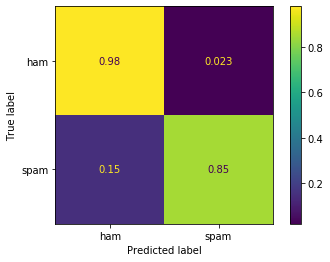

<Figure size 432x432 with 0 Axes>

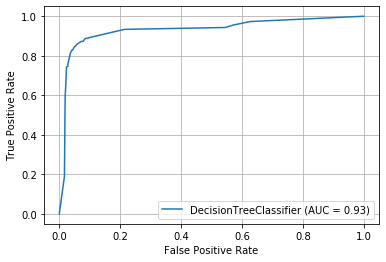

In [36]:
y_pred_knn = knn_best.predict(X_test_sc)
print("Confusion matrix (proportions) : ")
cm = confusion_matrix(y_test,y_pred_knn,normalize='true')
#print(np.round(cm,2))
print(' ')

ConfusionMatrixDisplay(cm, display_labels=["ham","spam"]).plot()
                                       

plt.figure(figsize=(6,6))
plot_roc_curve(tree,X_test,y_test)
plt.grid()

tree_fpr, tree_tpr, thresholds = roc_curve(y_test, y_pred_tree)

knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred_knn)

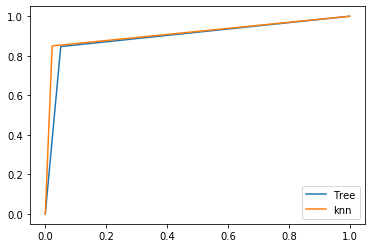

In [37]:

plt.plot(tree_fpr,tree_tpr,label="Tree")
plt.plot(knn_fpr,knn_tpr,label = "knn")
plt.legend()

# Situation de grande dimension

Dans ce jeu de données, on a 57 variables. Pour se mettre en situation de grande dimension avec p (nombre de variables) de l'ordre de n (nombre d'observations), on peut par exemple générer un ensemble d'apprentissage de 50 observations. [solution 1]

L'ensemble de test sert uniquement à la validation des algorithmes. On peut donc garder le reste des observations dans l'ensemble de test. 

On pourrait aussi tirer les observation de l'ensemble d'apprentissage dans l'ensemble d'apprentissage de la première partie pour conserver le mêême ensemble de test pour toutes les questions et ainsi obtenir des résultats comparables. [solution 2]

Avec les solutions 1 et 2 on réduit beaucoup la taille de l'ensemble d'apprentissage. Les performances des classifieursvont se dégrader. Mais il sera difficile de savori si la dégradation vient de la réduction du nombre d'exemples disponibles pour entrainer les modèles ou de la grande dimension. 

Un 3eme solution consiste alors à ajouter des variables générées aléatoirement à la base de données. [solution 3]

In [58]:
Xt_old = X_train_sc
yt_old = y_train

### 6- Effectuer les solutions 2 et 3

In [59]:
# Solution 1
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, Y, test_size=X.shape[0]-50, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_)
X_test_sc = scaler.transform(X_test_)
X_train_.shape

(50, 57)

In [60]:
############# code ici pour la solution 2

X_train_sc, X_test1, y_train, y_test1 = train_test_split(Xt_old, yt_old, test_size=X_train.shape[0]-50, random_state=42)

X_train_sc.shape

(50, 57)

In [61]:
############# code ici pour la solution 3 
from numpy import random
Z =  random.normal(loc=0.0, scale=1.0, size=(X.shape[0],X.shape[0]))
X_new  = np.concatenate((X,Z),axis=1)
X_new.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, Y, test_size=.33, random_state=42)


scaler = StandardScaler()
X_train_sc2 = scaler.fit_transform(X_train2)
X_test_sc2 = scaler.transform(X_test2)

Hind: pour génerer une variable de loi normal vous pouvez utiliser la faoction normal dans random

### 7-Répeter la question 3 et 4 

ajusté sur la table de la solution 3 (si les temps de calculs sont longs, vous pouvez réduire la grille des paramètres). 


In [64]:
############ code ici 
param_grid = {'max_depth':[5,10,15,20], 
             'min_samples_leaf':[5,10,15,20],
             'splitter' : ['best', 'random']}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train2,y_train2)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_gr

In [65]:
search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
########### code ici pour la prédiction dans l'ensemble test et calcule des mésures de validation + matrice de confusion
clf = search.best_estimator_
y_pred = clf.predict(X_test2)
f1 = f1_score(y_test2,y_pred,pos_label=1)
r = recall_score(y_test,y_pred,pos_label=1)
p = precision_score(y_test,y_pred,pos_label=1)
print("Precision:"%d, np.round(p,3), "recall:"%d, np.round(r,3), "f1-score:"%d, np.round(f1,3))

Precision: 0.921 recall: 0.831 f1-score: 0.874


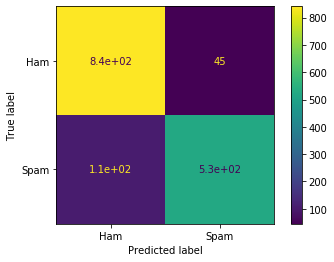

In [69]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Ham","Spam"]).plot()

Conclusion?? 
On observe une petite dégradation des résultats.

# Situation de classes deséquilibrées
###  8- Générer un ensemble comportant très peu de spam (1%)

In [72]:
########### code ici
i_spam = np.where(Y==1)[0]
print(len(i_spam))
i_ham = np.where(Y==0)[0]
i_spam_keep = np.random.choice(i_spam,size = int(np.round(len(i_spam)/100)))

i_ham_keep = np.random.choice(i_ham,size = 99*len(i_spam_keep))

X_deseq = np.concatenate((X[i_spam_keep,:],X[i_ham_keep,:]),axis=0)
X_deseq.shape


Y_deseq = np.concatenate((Y[i_spam_keep],Y[i_ham_keep]),axis=0)

print("Proportion de spam : ", np.mean(Y_deseq))


scaler = StandardScaler()
X_deseq_sc = scaler.fit_transform(X_deseq)

1813
Proportion de spam :  0.01


### 9- Répéter la question 3 et 4

In [73]:
########## code ici
param_grid = {'max_depth':[5,10,15,20], 
             'min_samples_leaf':[5,10,15,20],
             'splitter' : ['best', 'random']}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf, 
                      param_grid, 
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_deseq,Y_deseq)
print('Meilleur modèle')
print(search.best_estimator_)

Meilleur modèle
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [74]:
tree_best = search.best_estimator_
cv_scores = cross_validate(tree_best, X_deseq, Y_deseq, cv=cv,scoring=scoring)

print("Performances de l'estimateur des plus proches voisins")
print("Accuracy  : ", np.round(np.mean(cv_scores["test_accuracy"]),2), "(",np.round(np.std(cv_scores["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores["test_precision"]),2), "(",np.round(np.std(cv_scores["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores["test_recall"]),2), "(",np.round(np.std(cv_scores["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores["test_f1"]),2), "(",np.round(np.std(cv_scores["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores["test_roc_auc"]),2), "(",np.round(np.std(cv_scores["test_roc_auc"]),2),")")

Performances de l'estimateur des plus proches voisins
Accuracy  :  0.99 ( 0.0 )
Precision :  0.4 ( 0.39 )
Recall    :  0.17 ( 0.15 )
F1-score  :  0.22 ( 0.19 )
AUC       :  0.82 ( 0.19 )


C:\Users\saido\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saido\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conculsions?
L'accuracy est très bonne : on classe bien tous les ham. En revanche on observe que les autres critères (principalement basés sur les spams bien classés) sont mauvais.